# Simple Linear Regression

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style("whitegrid")

Regression searches for relationships among variables.

Simple Linear Regression searches for a linear relationship between an independent variable `x` and a dependand `y`.

## The data

In [2]:
df = pd.read_csv('salary_data.csv')
print(df.shape)
df.head()

(30, 2)


,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


## Correlation Analysis

In [3]:
x = np.array(df.YearsExperience)
y = np.array(df.Salary)

Let's plot the data.

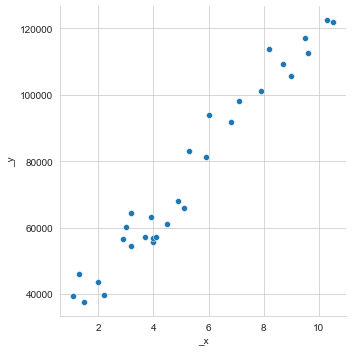

In [4]:
sns.relplot(data=df, x=x, y=y);   

It looks like there is a positive strong correlation between the variables. Let's calculate the correlation coefficient and its p-value.

In [5]:
corr, p_val = st.pearsonr(x, y)
print('Pearson Correlation Coefficient = %.4f, p-value = %.4f' %(corr, p_val))

Pearson Correlation Coefficient = 0.9782, p-value = 0.0000


There is a strong positive correlation between `YearsExperience` and `Salary`. 

p-value = 0.000 < 0.05, therefore the correlation is significant.

Let's find the equation of the trendline using simple linear regression.

For calculating the correlation coefficient, we can use the NumPy function `corrcoef`

In [6]:
corr = np.corrcoef(x, y)[0][1]
print('Pearson Correlation Coefficient = %.4f' %(corr))

Pearson Correlation Coefficient = 0.9782


## Simple Linear Regression with `sklearn`

In [7]:
from sklearn.linear_model import LinearRegression

It is necessary to reshape the `x` variable.

In [8]:
x = x.reshape(-1,1)
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [9]:
# Create a model and fit it
model = LinearRegression()

In [10]:
model.fit(x, y)

LinearRegression()

You can replace the last two statements for this one:

`model = LinearRegression().fit(x, y)`

In [11]:
print('Coefficient of determination: %.3f' %model.score(x, y))

Coefficient of determination: 0.957


In [12]:
print('Model: %.2f * YearsExperience + %.2f' %(model.coef_, model.intercept_))

Model: 9449.96 * YearsExperience + 25792.20


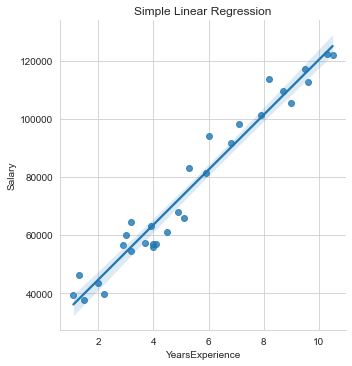

In [13]:
sns.lmplot(data=df, x='YearsExperience', y='Salary').set(title='Simple Linear Regression');

In [14]:
# Predict response
y_pred = model.predict(x)
print('Predicted response:', y_pred, sep='\n')

Predicted response:
[ 36187.15875227  38077.15121656  39967.14368085  44692.12484158
  46582.11730587  53197.09093089  54142.08716303  56032.07962732
  56032.07962732  60757.06078805  62647.05325234  63592.04948449
  63592.04948449  64537.04571663  68317.03064522  72097.0155738
  73987.00803809  75877.00050238  81546.97789525  82491.9741274
  90051.94398456  92886.932681   100446.90253816 103281.8912346
 108006.87239533 110841.86109176 115566.84225249 116511.83848464
 123126.81210966 125016.80457395]


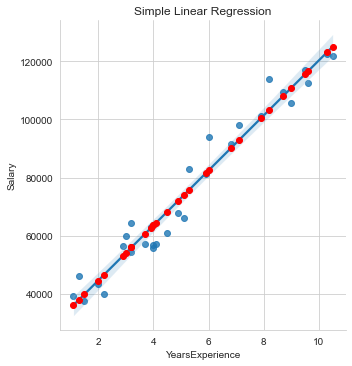

In [15]:
# Adding the predictive values
sns.lmplot(data=df, x='YearsExperience', y='Salary').set(title='Simple Linear Regression')
plt.plot(x, y_pred, 'ro');

## Simple Linear Regression with `statsmodels`

In [16]:
import statsmodels.api as sm

In [17]:
Xc = sm.add_constant(x)

In [18]:
mod = sm.OLS(y, Xc)

In [19]:
res = mod.fit()

In [20]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 06 Jun 2022   Prob (F-statistic):           1.14e-20
Time:                        07:56:54   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
x1          9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

There is a lot of information in the summary option.
- R-squared: 0.957      (`res.squared`)
- model coefficients: const: 2.579e+04, X1: 9449.9623 (`res.params`) 
- tvalues for each coefficient: const: 11.347, X1: 24.950 (`res.tvalues`)
- pvalues for each coefficient: const: 0.000, X1: 0.000 (`res.pvalues`)

In [21]:
print('Coefficient of determination: %.3f' %(res.rsquared))

Coefficient of determination: 0.957


`res.params` returns a list with the model coefficients

In [22]:
res.params

array([25792.20019867,  9449.96232146])

Writing the model equation:

In [23]:
print('Model: %.2f * YearsExperience + %.2f' %(res.params[1], res.params[0]))

Model: 9449.96 * YearsExperience + 25792.20


Visualizing the t-values and p-values for each parameter in the model:

In [24]:
coeff_names = ['       Constant', 'YearsExperience']
for i in range(len(res.params)):
    print('%s \t t-value = %.2f \t p-value = %.4f' %(coeff_names[i], res.tvalues[i], res.pvalues[i]))

       Constant 	 t-value = 11.35 	 p-value = 0.0000
YearsExperience 	 t-value = 24.95 	 p-value = 0.0000


Both coefficient are significant!

With `res.predict()` we are making predictions, in this case, for the same x values used for fitting the model.

In [25]:
# Predicting responses
y_pred2 = res.predict()
print('Predicted response:', y_pred, sep='\n')

Predicted response:
[ 36187.15875227  38077.15121656  39967.14368085  44692.12484158
  46582.11730587  53197.09093089  54142.08716303  56032.07962732
  56032.07962732  60757.06078805  62647.05325234  63592.04948449
  63592.04948449  64537.04571663  68317.03064522  72097.0155738
  73987.00803809  75877.00050238  81546.97789525  82491.9741274
  90051.94398456  92886.932681   100446.90253816 103281.8912346
 108006.87239533 110841.86109176 115566.84225249 116511.83848464
 123126.81210966 125016.80457395]


Graphing again!

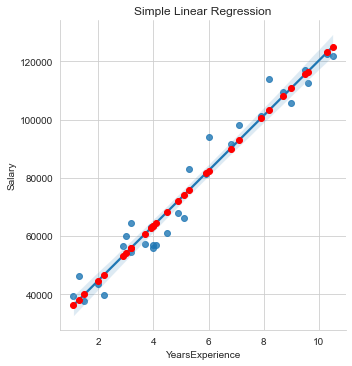

In [26]:
sns.lmplot(data=df, x='YearsExperience', y='Salary').set(title='Simple Linear Regression')
plt.plot(x, y_pred2, 'ro');

## Model with a quadratic term

Getting a linear model with a quadratic term is an option that can be useful sometimes. 

In our example, there is no need to do it because the r-squared is almost 1. Nevertheless, we are going to learn how to do it!

In [27]:
# Creating the quadratic term
df['YearsExperience2'] = df['YearsExperience'] * df['YearsExperience']
df.head()

,YearsExperience,Salary,YearsExperience2
0,1.1,39343,1.21
1,1.3,46205,1.69
2,1.5,37731,2.25
3,2.0,43525,4.00
4,2.2,39891,4.84


There are two independent variables.

In [28]:
x2 = df[['YearsExperience','YearsExperience2']]
x2.head()

,YearsExperience,YearsExperience2
0,1.1,1.21
1,1.3,1.69
2,1.5,2.25
3,2.0,4.00
4,2.2,4.84


In [29]:
X2c = sm.add_constant(x2)

In [30]:
mod2 = sm.OLS(y, X2c)

In [31]:
res2 = mod2.fit()

In [32]:
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     300.3
Date:                Mon, 06 Jun 2022   Prob (F-statistic):           3.59e-19
Time:                        07:56:55   Log-Likelihood:                -301.43
No. Observations:                  30   AIC:                             608.9
Df Residuals:                      27   BIC:                             613.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2.621e+04   4554.674      5.756      0.000    1.69e+04    3.56e+04
YearsExperience   9259.2839   1811.007      5.113      0.000    5543.405     1.3e+04
YearsExperience2    16.3926    152.121      0.108      0.915    -295.734     328.520
==============================================================================
Omnibus:                        2.181   Durbin-Watson:                   1.649
Prob(Omnibus):                  0.336   Jarque-Bera (JB):                1.627
Skew:                           0.384   Prob(JB):                        0.443
Kurtosis:                       2.156   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
print('Coefficient of determination: %.3f' %(res2.rsquared))

Coefficient of determination: 0.957


There is no change in the r-squared value. That means the quadratic variable is not adding anything significant to the model.

Visualizing the t-values and p-values for each parameter in the model:

In [34]:
coeff_names2 = ['        Constant', ' YearsExperience', 'YearsExperience2']
for i in range(len(res2.params)):
    print('%s \t t-value = %.2f \t p-value = %.4f' %(coeff_names2[i], res2.tvalues[i], res2.pvalues[i]))

        Constant 	 t-value = 5.76 	 p-value = 0.0000
 YearsExperience 	 t-value = 5.11 	 p-value = 0.0000
YearsExperience2 	 t-value = 0.11 	 p-value = 0.9150


The p-value of the quadratic variable is not significant. That shows the term is not relevant for the model.

Reference:
- VanderPlas, J. (2017) Python Data Science Handbook: Essential Tools for Working with Data. USA: O’Reilly Media, Inc. chapter 4.